In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Dataset.csv")


In [ ]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [ ]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# Load and preprocess the data
try:
    data = pd.read_csv("/content/Dataset.csv")
except FileNotFoundError:
    print("Error: 'Dataset.csv' not found. Please upload the file to the Colab environment.")
    exit()

data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

label_encoders = {}
for column in ['City', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Price range']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

features = ['Country Code', 'City', 'Average Cost for two', 'Has Table booking',
            'Has Online delivery', 'Is delivering now', 'Price range', 'Votes']
target = 'Aggregate rating'
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model Evaluation:\nMean Squared Error: {mse:.2f}\nR² Score: {r2:.2f}")
    return model

# Train Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model = train_and_evaluate_model(decision_tree_model, X_train, y_train, X_test, y_test)

# Train Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model = train_and_evaluate_model(random_forest_model, X_train, y_train, X_test, y_test)


def predict_aggregate_rating(model, input_data):
    input_data_copy = input_data.copy()
    for column in ['City', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Price range']:
        if column in input_data_copy and input_data_copy[column] in label_encoders[column].classes_:
            input_data_copy[column] = label_encoders[column].transform([input_data_copy[column]])[0]
        else:
            return f"Error: Invalid value for '{column}'. Value not found in training data."
    new_data = pd.DataFrame([input_data_copy])
    prediction = model.predict(new_data)[0]
    return prediction

# Example usage (you can choose which model to use)
example_input = {
    'Country Code': 1,
    'City': 'Makati City',
    'Average Cost for two': 500,
    'Has Table booking': 'Yes',
    'Has Online delivery': 'No',
    'Is delivering now': 'Yes',
    'Price range': 3,
    'Votes': 200
}

predicted_rating_dt = predict_aggregate_rating(decision_tree_model, example_input)
print(f"Decision Tree Predicted Aggregate Rating: {predicted_rating_dt:.2f}")

predicted_rating_rf = predict_aggregate_rating(random_forest_model, example_input)
print(f"Random Forest Predicted Aggregate Rating: {predicted_rating_rf:.2f}")

Model Evaluation:
Mean Squared Error: 0.19
R² Score: 0.91
Model Evaluation:
Mean Squared Error: 0.12
R² Score: 0.95
Decision Tree Predicted Aggregate Rating: 3.10
Random Forest Predicted Aggregate Rating: 3.98


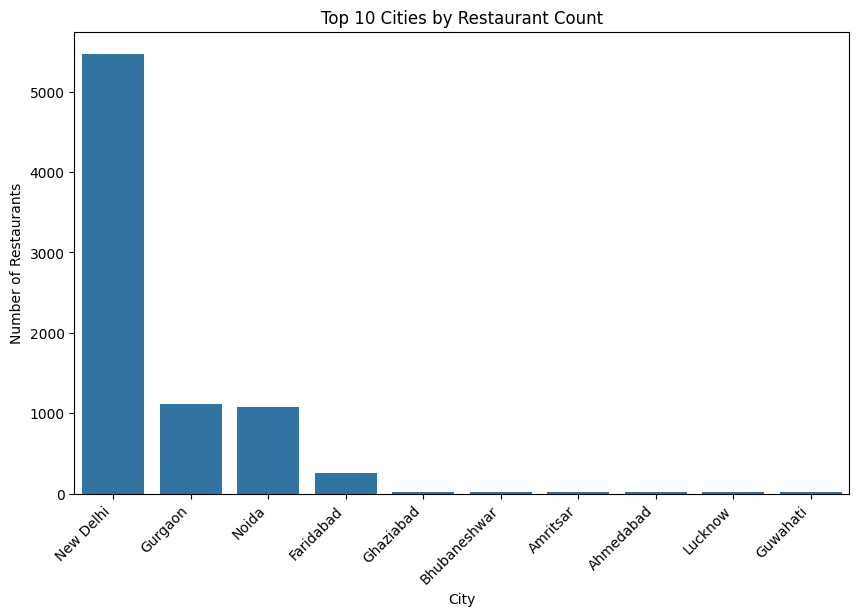

In [ ]:
# Visualize the distribution of 'Aggregate rating' across different cities (top 10)
city_counts = df['City'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.title('Top 10 Cities by Restaurant Count')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.show()

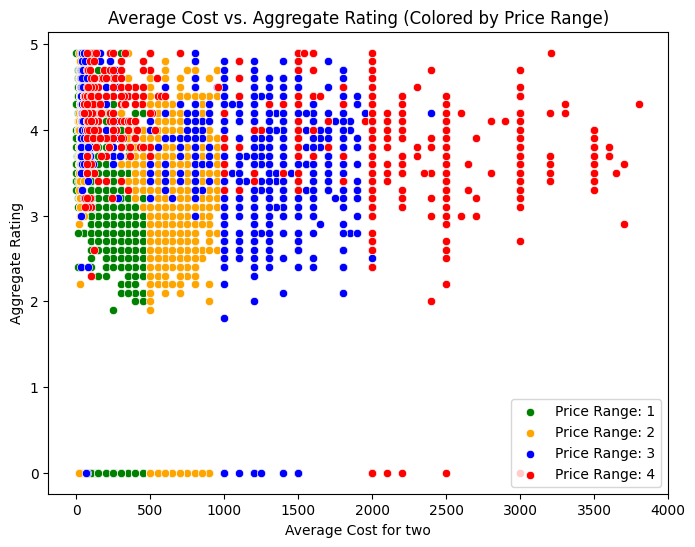

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# Define price ranges and corresponding colors
price_ranges = {
    1: 'green',
    2: 'orange',
    3: 'blue',
    4: 'red'
}

# Create the scatter plot with colors based on price range
for price_range, color in price_ranges.items():
    subset = df_filtered[df_filtered['Price range'] == price_range]
    sns.scatterplot(x='Average Cost for two', y='Aggregate rating', data=subset, color=color, label=f'Price Range: {price_range}')

# Customize the plot
plt.title('Average Cost vs. Aggregate Rating (Colored by Price Range)')
plt.xlabel('Average Cost for two')
plt.ylabel('Aggregate Rating')
plt.xticks(range(0, 4001, 500))  # Adjust x-axis ticks
plt.legend() # Show legend
plt.show()

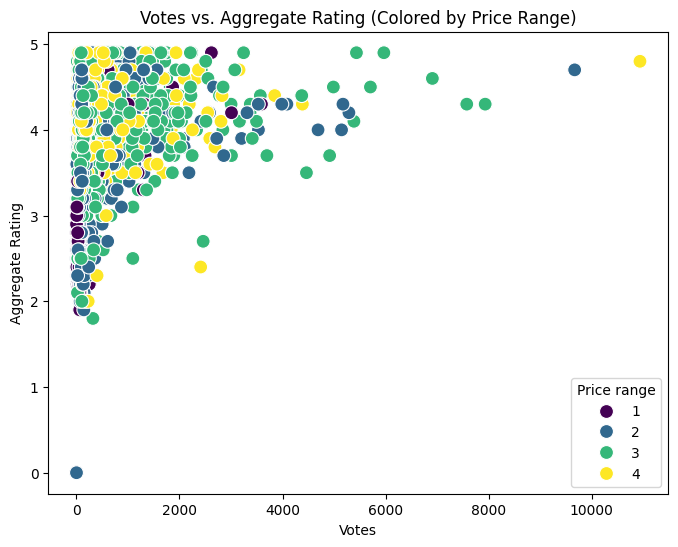

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, hue='Price range', palette='viridis', s=100) # Added hue and palette
plt.title('Votes vs. Aggregate Rating (Colored by Price Range)') # More descriptive title
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()

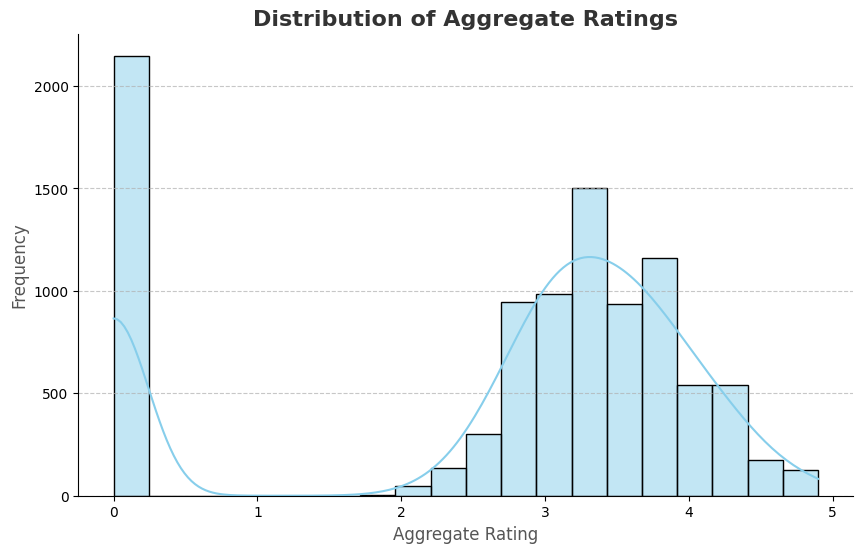

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], kde=True, color='skyblue', bins=20)  # Use a visually appealing color
plt.title('Distribution of Aggregate Ratings', fontsize=16, fontweight='bold', color='#333333') # Style the title
plt.xlabel('Aggregate Rating', fontsize=12, color='#555555')  # Customize x-axis label
plt.ylabel('Frequency', fontsize=12, color='#555555')  # Customize y-axis label
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a subtle grid
sns.despine()  # Remove top and right spines
plt.show()

<ipython-input-19-1ee49e8eb527>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='Aggregate rating', data=df[df['City'].isin(top_10_cities)], palette='Set3')


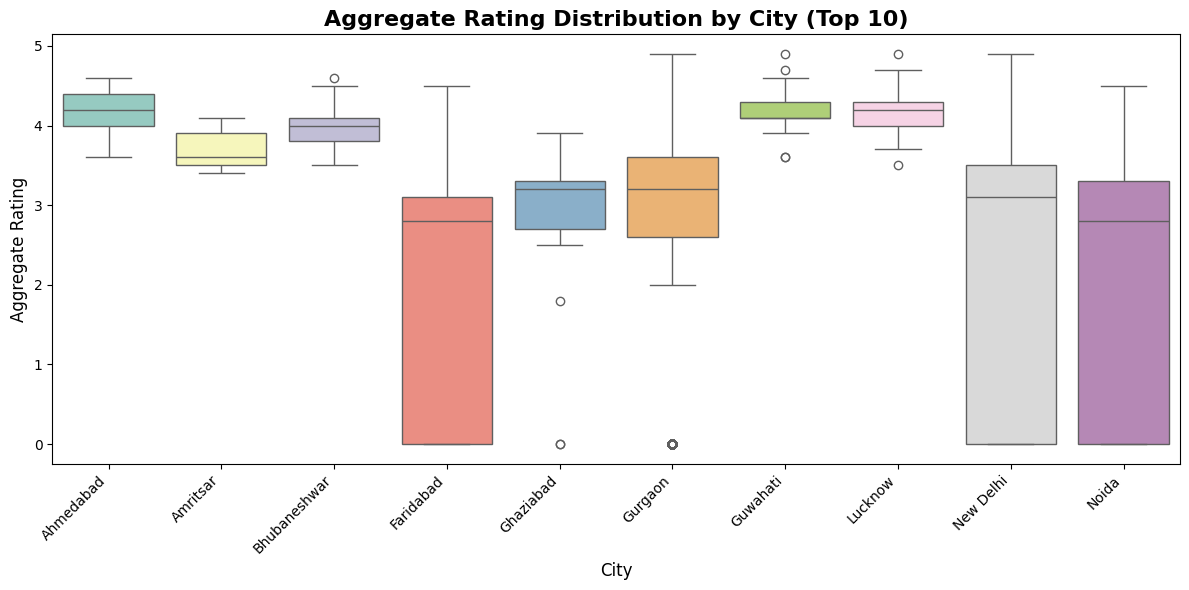

In [ ]:
top_10_cities = df['City'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Aggregate rating', data=df[df['City'].isin(top_10_cities)], palette='Set3')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Aggregate Rating Distribution by City (Top 10)', fontsize=16, fontweight='bold')
plt.xlabel('City', fontsize=12)
plt.ylabel('Aggregate Rating', fontsize=12)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

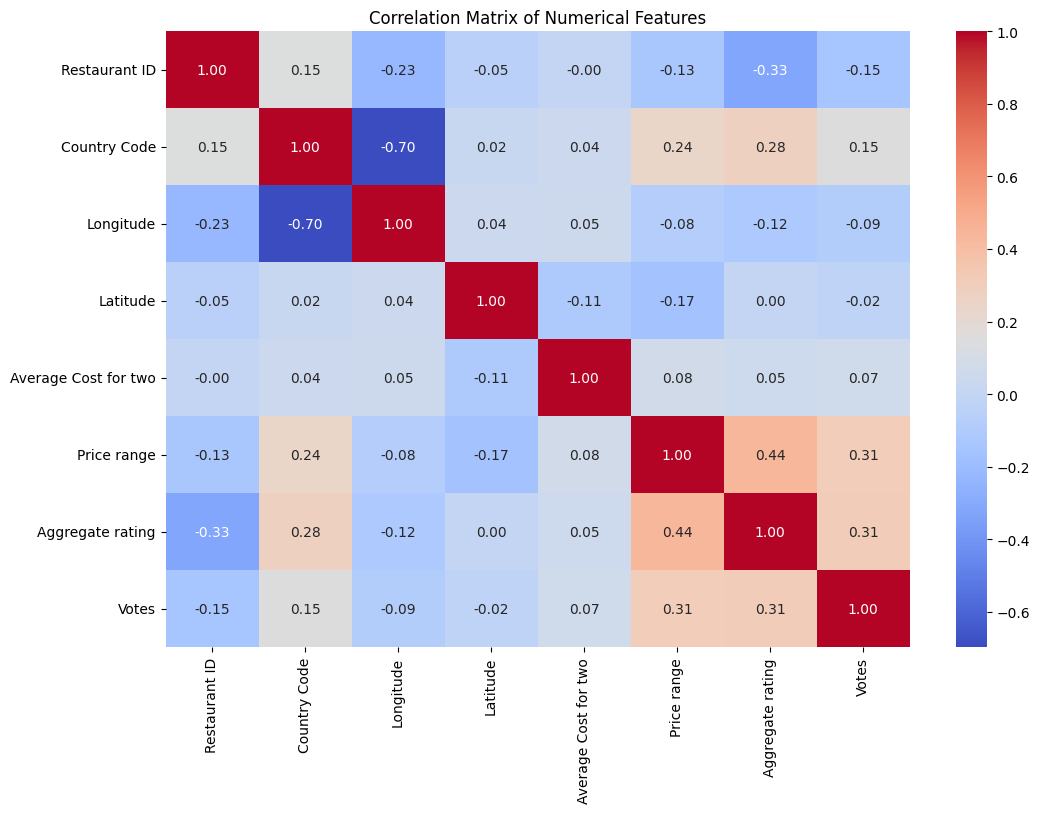

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

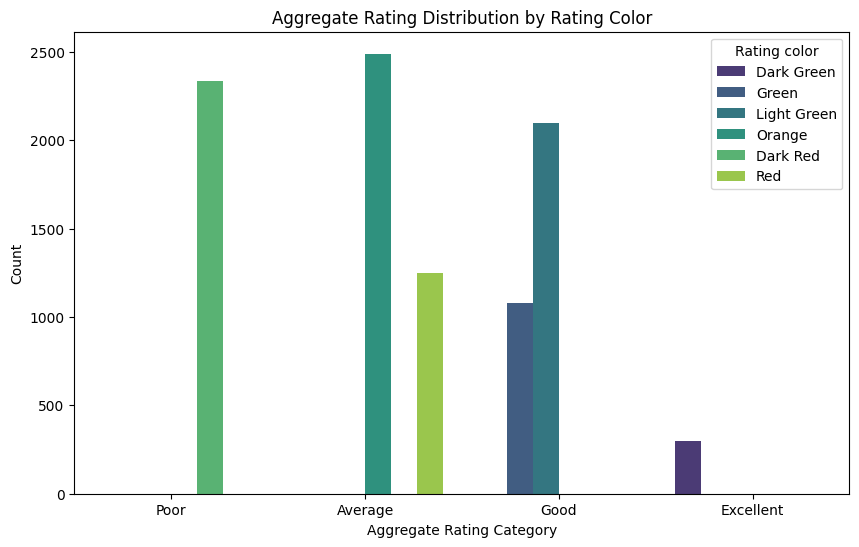

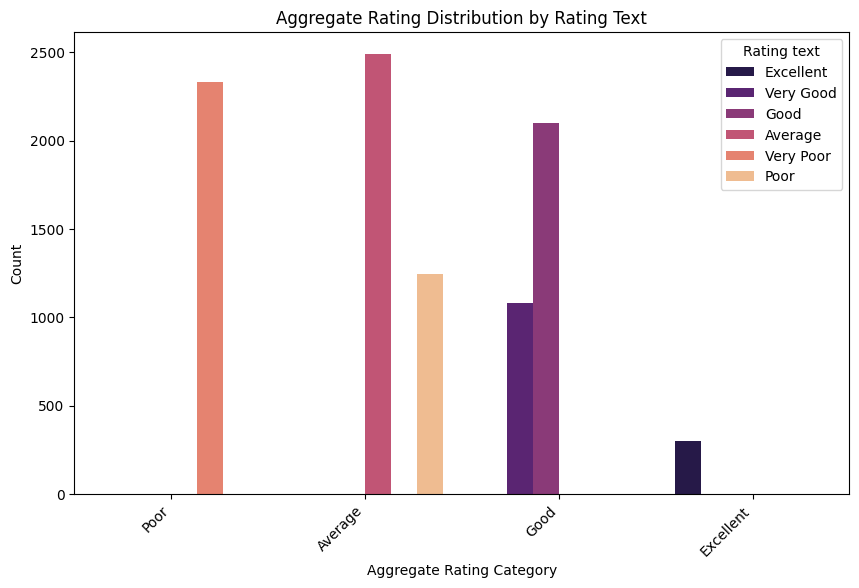

Rating color,Dark Green,Dark Red,Green,Light Green,Orange,Red
Rating text,Excellent,Very Poor,Very Good,Good,Average,Poor
Rating Category,,,,,,
Poor,0,2334,0,0,0,0
Average,0,0,0,0,2490,1247
Good,0,0,1079,2100,0,0
Excellent,301,0,0,0,0,0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rating_bins = [0, 2.5, 3.5, 4.5, 5]  # Define rating bins
rating_labels = ['Poor', 'Average', 'Good', 'Excellent'] # Define rating labels
df['Rating Category'] = pd.cut(df['Aggregate rating'], bins=rating_bins, labels=rating_labels, right=False)

# Visualize the relationship between Aggregate rating and Rating color
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating Category', data=df, hue='Rating color', palette='viridis')  # Use a suitable color palette
plt.title('Aggregate Rating Distribution by Rating Color')
plt.xlabel('Aggregate Rating Category')
plt.ylabel('Count')
plt.show()

# Visualize the relationship between Aggregate rating and Rating text
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating Category', data=df, hue='Rating text', palette='magma') # Use a suitable color palette
plt.title('Aggregate Rating Distribution by Rating Text')
plt.xlabel('Aggregate Rating Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.show()

# Create a cross-tabulation
rating_color_text = pd.crosstab(df['Rating Category'], [df['Rating color'], df['Rating text']])
rating_color_text